### Employee Retention Prediction

**Introduction**
<p style = 'text-align: justify;'>
We are going to build a machine learning model that will predict if an employee is going to leave the Salifort Motors company. A model like this will be beneficial for the company to figure out factors that contribute the most towards an employee's desicion to leave, and also will help the company to improve. Data was provided as a part of the capstone project under the Google Advanced Data Analytics Professional Certificate.

**Data Description**

| Variable | Description |
|-----|-----|
| satisfaction_level | Employee-reported job satisfaction level [0&ndash;1]|
| last_evaluation | Score of employee's last performance review [0&ndash;1]|
| number_project | Number of projects employee contributes to|
| average_monthly_hours | Average number of hours employee worked per month|
| time_spend_company | How long the employee has been with the company (years) |
| Work_accident | Whether or not the employee experienced an accident while at work |
| left | Whether or not the employee left the company |
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years |
| Department | The employee's department |
| salary | The employee's salary (U.S. dollars) |

**Plan**
1. Clean Data
2. Identify Key features in the data and perform exploratory data analysis (EDA)
3. Perform feature engineering
4. Build machine learning models, compare their performance and select the champion model
5. Advise on future steps

In [1]:
# Import packages for data manipulation
import pandas as pd

# Import packages for data visualization
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

import pickle

**Exploratory Data Analysis**

In [2]:
data = pd.read_csv('employee-retention.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.rename(columns = {'time_spend_company': 'tenure', 
                      'average_montly_hours': 'average_monthly_hours', 
                      'Work_accident': 'work_accident', 'Department': 'department'}, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   tenure                 14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
# Check for missing values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [9]:
# Check for duplicates
data.duplicated().sum()

np.int64(3008)

In [10]:
data[data.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
data = data.drop_duplicates(keep = 'first')


# Display first few rows of new dataframe as needed
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
data.shape

(11991, 10)

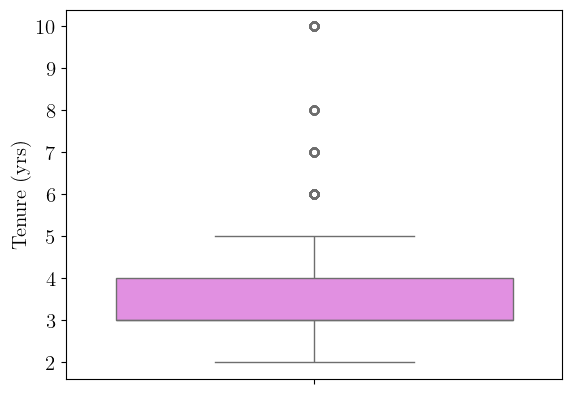

In [13]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

sns.boxplot(data['tenure'], color = 'violet')
plt.ylabel('Tenure (yrs)', fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [14]:
# Determine the number of rows containing outliers

Q1 = data['tenure'].quantile(0.25)
Q3 = data['tenure'].quantile(0.75)

iqr = Q3 - Q1
upper_limit = Q3 + 1.5*iqr
lower_limit = Q1 - 1.5*iqr

outliers = data[(data['tenure'] < lower_limit) | (data['tenure'] > upper_limit)]
print(len(outliers))

824


We observe that `tenure` has outliers in it and we have determined the range to avoid these outliers.

In [15]:
# Get percentages of people who left vs. stayed
data['left'].value_counts(normalize = True)


left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

We notice that 16.6% employee has left the company.

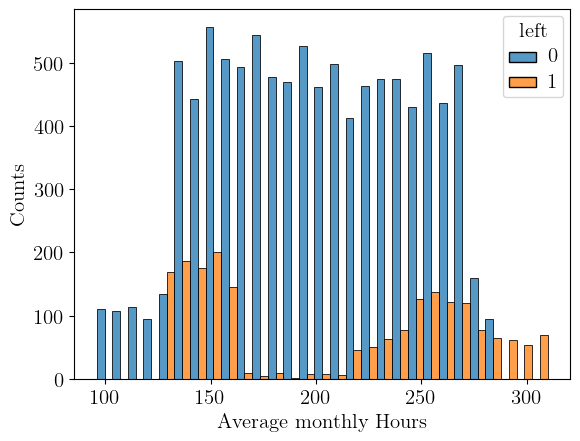

In [16]:
ax = sns.histplot(data = data, x = 'average_monthly_hours', hue = 'left', multiple = 'dodge')
plt.xlabel('Average monthly Hours', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.setp(ax.get_legend().get_texts(), fontsize = '15')
plt.setp(ax.get_legend().get_title(), fontsize = '15')
plt.show()

Average monthly hours have two peaks for employees who left the company, around 140 and 260 hours.

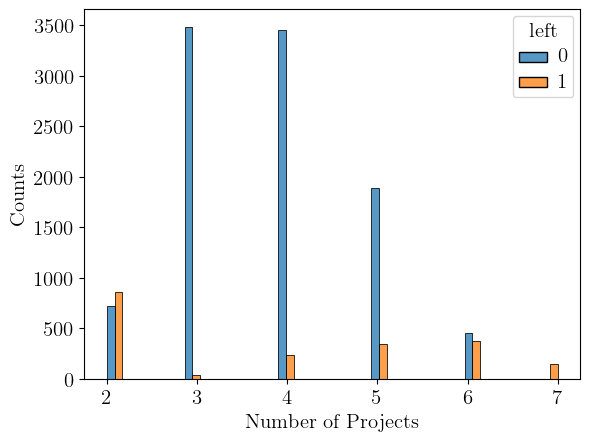

In [17]:
ax = sns.histplot(data = data, x = 'number_project', hue = 'left', multiple = 'dodge')
plt.xlabel('Number of Projects', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.setp(ax.get_legend().get_texts(), fontsize = '15')
plt.setp(ax.get_legend().get_title(), fontsize = '15')
plt.show()

Employees still in the company have mostly completed 3-4 projects, while employees who left, have completed either very small (~2) or very large number (~6) of projects. 

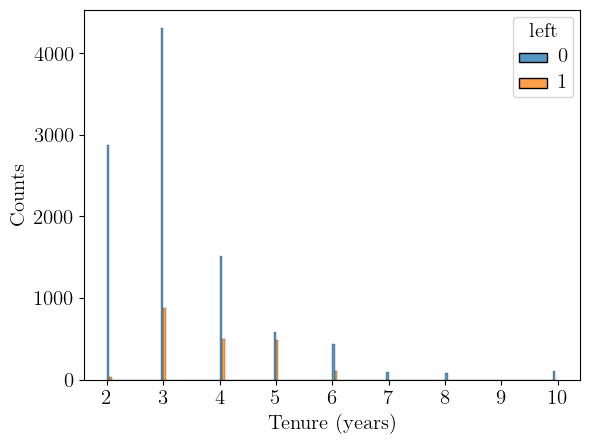

In [18]:
ax = sns.histplot(data = data, x = 'tenure', hue = 'left', multiple = 'dodge')
plt.xlabel('Tenure (years)', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.setp(ax.get_legend().get_texts(), fontsize = '15')
plt.setp(ax.get_legend().get_title(), fontsize = '15')
plt.show()

Most employees have/had ~3 years of tenure.

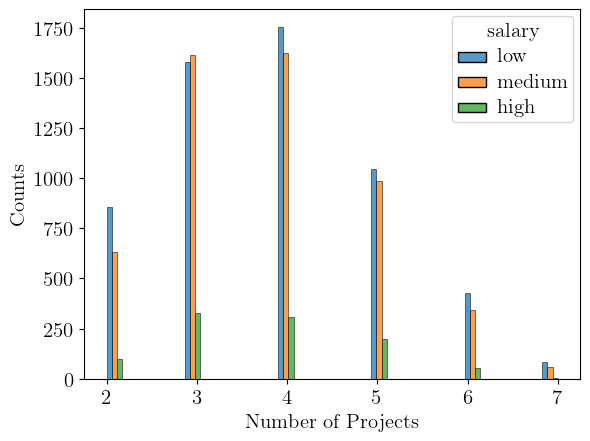

In [19]:
ax = sns.histplot(data = data, x = 'number_project', hue = 'salary', multiple = 'dodge')
plt.xlabel('Number of Projects', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.setp(ax.get_legend().get_texts(), fontsize = '15')
plt.setp(ax.get_legend().get_title(), fontsize = '15')
plt.show()

Most employees have finished 4 projects.

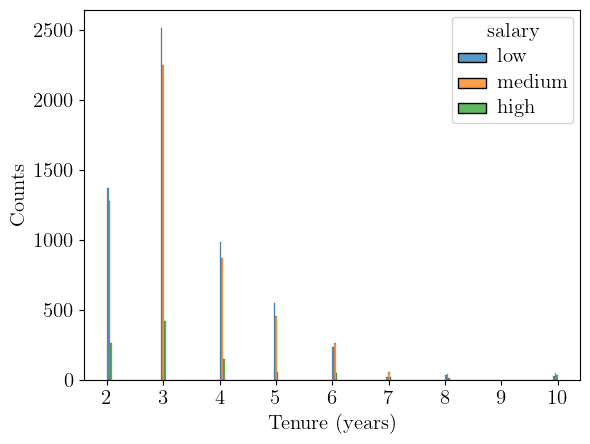

In [20]:
ax = sns.histplot(data = data, x = 'tenure', hue = 'salary', multiple = 'dodge')
plt.xlabel('Tenure (years)', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.setp(ax.get_legend().get_texts(), fontsize = '15')
plt.setp(ax.get_legend().get_title(), fontsize = '15')
plt.show()

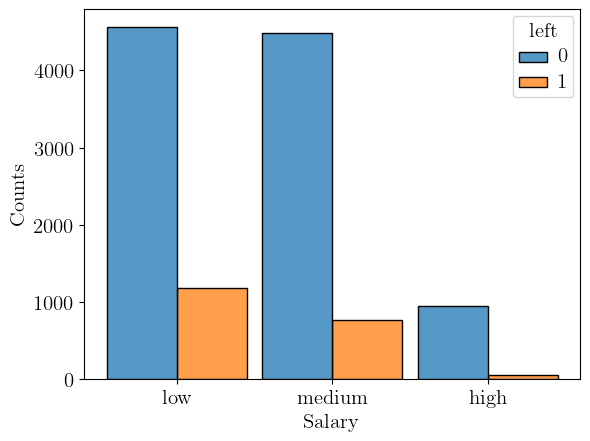

In [21]:
ax = sns.histplot(data, x = 'salary', hue = 'left', multiple = 'dodge', shrink = 0.9, edgecolor = 'k')
plt.xlabel('Salary', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.setp(ax.get_legend().get_texts(), fontsize = '15')
plt.setp(ax.get_legend().get_title(), fontsize = '15')
plt.show()

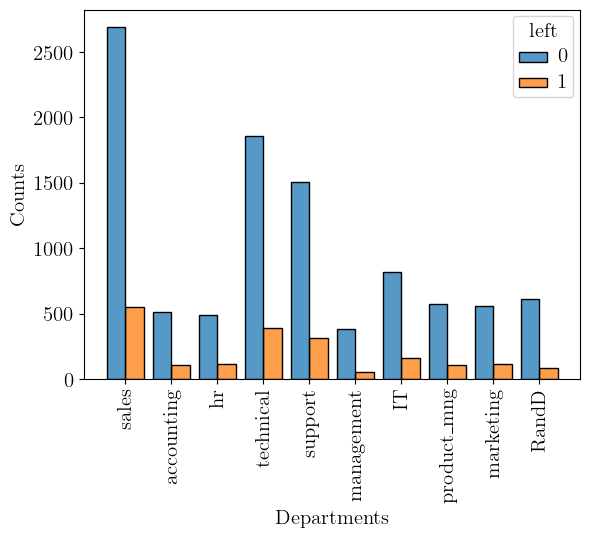

In [41]:
ax = sns.histplot(data, x = 'department', hue = 'left', multiple = 'dodge', shrink = 0.8, edgecolor = 'k')
plt.xlabel('Departments', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.setp(ax.get_legend().get_texts(), fontsize = '15')
plt.setp(ax.get_legend().get_title(), fontsize = '15')
plt.show()

**Model Building and Evaluation**

I am going to build a logistic regression model, and hyper-parameter tuned Decision Tree and XGBoost models. Decision Tree and XGBoost models will be cross-validated over 5 folds of training data. For performance metric, I am going to choose area under the ROC curve.

In [42]:
df2 = data.copy()
df2['salary'] = df2['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df2 = pd.get_dummies(df2, drop_first = False)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


**Logistic Regression Model**

In [44]:
df_reg = df2[(df2['tenure'] >= lower_limit) & (df2['tenure'] <= upper_limit)]
df_reg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [45]:
y = df_reg['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [46]:
X = df_reg.drop('left', axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [51]:
log_clf = LogisticRegression(random_state = 42, max_iter = 5000).fit(X_train, y_train)

In [55]:
y_pred_reg = log_clf.predict(X_test)

In [92]:
pickle.dump(log_clf, open('log_reg.pkl', 'wb'))

In [94]:
log_clf = pickle.load(open('log_reg.pkl', 'rb'))

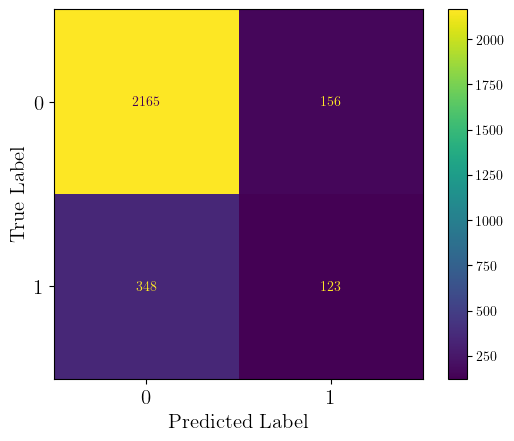

In [56]:
log_cm = confusion_matrix(y_test, y_pred_reg, labels = log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)
log_disp.plot(values_format = '')
plt.xlabel('Predicted Label', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [57]:
print("Logistic Regression Model Metrics Report")
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred_reg))
print("Precision:", "%.6f" % precision_score(y_test, y_pred_reg))
print("Recall:", "%.6f" % recall_score(y_test, y_pred_reg))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred_reg))

Logistic Regression Model Metrics Report
Accuracy: 0.819484
Precision: 0.440860
Recall: 0.261146
F1 Score: 0.328000


**Tree Based Model**

In [58]:
y = df2['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [61]:
X = df2.drop('left', axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

**Decision Tree Model**

In [67]:
tree = DecisionTreeClassifier(random_state = 0)

cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
tree_cv = GridSearchCV(tree, cv_params, scoring = scoring, cv = 5, refit = 'roc_auc')

In [68]:
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [90]:
pickle.dump(tree_cv, open('tree_cv.pkl', 'wb'))

In [91]:
tree_cv = pickle.load(open('tree_cv.pkl', 'rb'))

In [69]:
tree_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [70]:
tree_cv.best_score_

np.float64(0.9719548921460799)

**Random Forest Model**

In [71]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = 'roc_auc')

In [72]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [74]:
pickle.dump(rf_cv, open('rf_cv.pkl', 'wb'))

In [76]:
rf_cv = pickle.load(open('rf_cv.pkl', 'rb'))

In [77]:
rf_cv.best_score_

np.float64(0.9802691088116242)

In [78]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

**Choosing Champion Model**

Random Forest model performed better than both the Decision Tree and Logistic Regression models with score ~0.98.

In [81]:
y_pred_rf = rf_cv.best_estimator_.predict(X_test)

In [82]:
print("Random Forest Model Metrics Report")
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred_rf))
print("Precision:", "%.6f" % precision_score(y_test, y_pred_rf))
print("Recall:", "%.6f" % recall_score(y_test, y_pred_rf))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred_rf))

Random Forest Model Metrics Report
Accuracy: 0.979320
Precision: 0.963830
Recall: 0.909639
F1 Score: 0.935950


**Feature Engineering**
We should not be satisfied with these extremely high scores as there might be data leakeage. To avoid this situation, we will perform feature engineering.

In [83]:
df3 = df2.drop('satisfaction_level', axis = 1)
df3.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [86]:
df2['average_monthly_hours'].min()

np.int64(96)

In [88]:
df3['overworked'] = (df2['average_monthly_hours'] > 180).astype(int)
df3['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [89]:
df3 = df3.drop('average_monthly_hours', axis = 1)
df3.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


**Round Two**

In [95]:
y = df3['left']
X = df3.drop('left', axis = 1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

**Decision Tree Round Two**

In [97]:
tree = DecisionTreeClassifier(random_state = 0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tree2_cv = GridSearchCV(tree, cv_params, scoring = scoring, cv = 5, refit = 'roc_auc')

In [98]:
tree2_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [100]:
pickle.dump(tree2_cv, open('tree2_cv.pkl', 'wb'))
tree2_cv = pickle.load(open('tree2_cv.pkl', 'rb'))

In [101]:
tree2_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [102]:
tree2_cv.best_score_

np.float64(0.9553586930334521)

**Random Forest Round Two**

In [103]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2 ,3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf2_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = 'roc_auc')

In [104]:
rf2_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [105]:
pickle.dump(rf2_cv, open('rf2_cv.pkl', 'wb'))
rf2_cv = pickle.load(open('rf2_cv.pkl', 'rb'))

In [106]:
rf2_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [107]:
rf2_cv.best_score_

np.float64(0.9649938519898542)

**Champion Model**

Random Forest again outperformed the other two models. The score is slightly lower than what we had before, but at least we have removed possibility of data leakage.

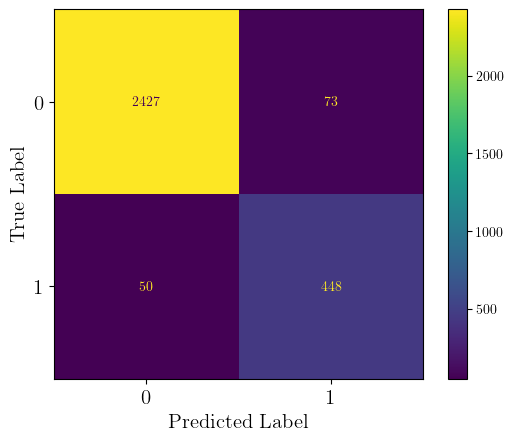

In [110]:
y_pred = rf2_cv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = rf2_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf2_cv.classes_)
disp.plot(values_format='')
plt.xlabel('Predicted Label', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [111]:
print("Random Forest Model Metrics Report on Test Data")
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

Random Forest Model Metrics Report on Test Data
Accuracy: 0.958973
Precision: 0.859885
Recall: 0.899598
F1 Score: 0.879293


**Feature Importance**

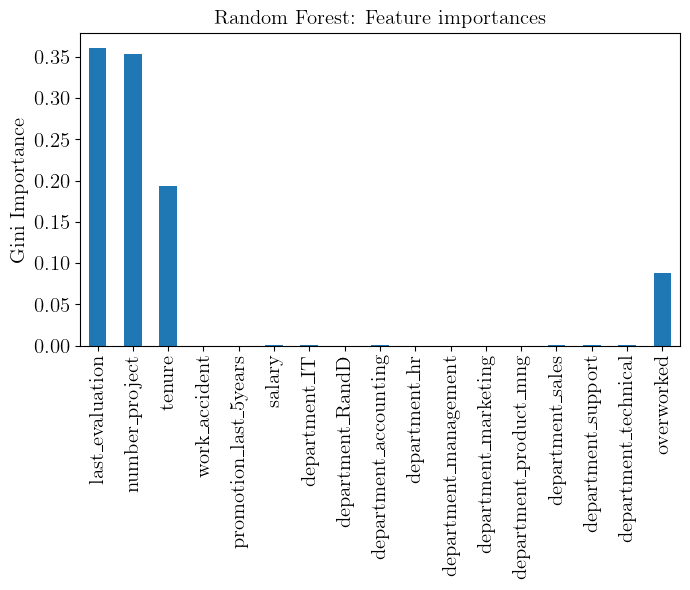

In [113]:
importances = rf2_cv.best_estimator_.feature_importances_
rf2_importances = pd.Series(importances, index = X_test.columns)

fig, ax = plt.subplots(figsize = (7, 6))
rf2_importances.plot.bar(ax = ax)
ax.set_title('Random Forest: Feature importances', fontsize = 15)
ax.set_ylabel('Gini Importance', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
fig.tight_layout()

**Conclusion**

1. Logistic Regression model was outperformed by both the Random Forest and Decision Tree models based on AUC meric.
2. The Random Forest model performed slightly better than the Decision Tree model. Hence, Random Forest model was chosen as the champion model.
3. Last evaluation, number of projects employees worked on and whether the employees overworked or not seem to be the decisive factors.

**Future Steps**

Based on the above analysis, a few steps can be taken by the company to retain their employees.
1. Employees should be made aware of the working hour policy clearly.
2. There should be a maximum number of projects employees can work on.
3. Evaluation should be fair and not biased towards who works most.
4. Overworked employees should be compensated properly, maybe through bonuses or promotions.